In [2]:
import pandas as pd
import matplotlib.pyplot as lt 
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_excel("1673873196_hr_comma_sep(1).xlsx")

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.shape

(14999, 10)

In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
catecolumns=[x for x in df.columns   if df[x].dtype=="O"]
             

In [9]:
catecolumns

['sales', 'salary']

In [10]:
for  i in catecolumns:
    u=df[i].unique()
    print(i,len(u))

sales 10
salary 3


In [11]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
sales=pd.get_dummies(df["sales"])

In [14]:
sales

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [15]:
salary=pd.get_dummies(df["salary"])

In [16]:
salary

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [17]:
newdf=pd.concat([df,salary,sales],axis=1)

In [18]:
newdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0


In [19]:
newdf.shape

(14999, 23)

In [146]:
newdf.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'high', 'low', 'medium', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'support',
       'technical'],
      dtype='object')

<AxesSubplot:>

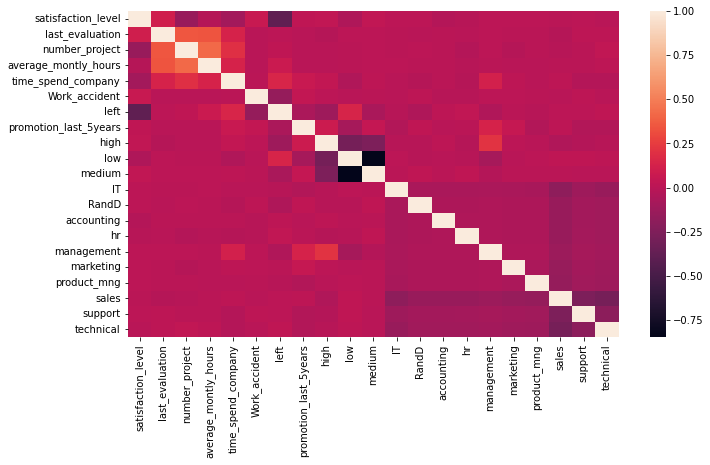

In [20]:
lt.figure(figsize=(11,6))
sns.heatmap(newdf.corr())

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

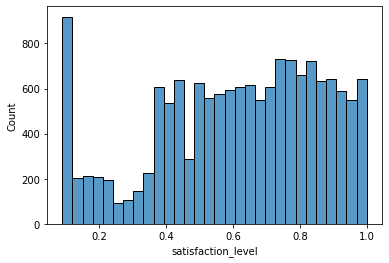

In [21]:
sns.histplot(newdf["satisfaction_level"])

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

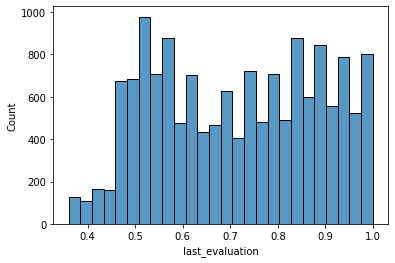

In [22]:
sns.histplot(newdf["last_evaluation"])

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

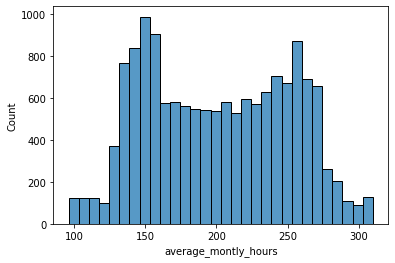

In [23]:
sns.histplot(newdf["average_montly_hours"])

<AxesSubplot:xlabel='left'>

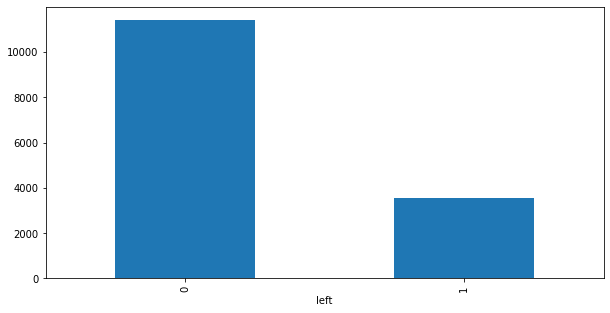

In [148]:
plt.figure(figsize=(10,5))
newdf.groupby(newdf["left"])["number_project"].count().plot(kind="bar")

In [25]:
newdf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [26]:
from sklearn.cluster import KMeans

In [27]:
km=KMeans(n_clusters=3)
ypredict=km.fit_predict(newdf[["last_evaluation","satisfaction_level"]])

In [28]:
ypredict

array([0, 2, 1, ..., 0, 1, 0], dtype=int32)

In [29]:
newdf["cluster"]=ypredict

In [30]:
df.drop(["sales","salary"],axis=1,inplace=True)

In [31]:
newdf.head(100)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,1,0,0,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,2
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.37,0.51,2,155,3,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,0
96,0.10,0.77,6,265,4,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,1
97,0.10,0.84,6,279,4,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,1
98,0.11,0.97,6,284,4,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,1


In [32]:
def clusterindicesnumpy(clusnum,label_array):
    return np.where(label_array==clusnum)[0]

In [33]:
clusterindicesnumpy(1,km.labels_)

array([    2,     6,    11, ..., 14979, 14991, 14997])

In [34]:
clusterindicesnumpy(2,km.labels_)

array([    1,     3,     7, ..., 14987, 14990, 14993])

In [35]:
clusterindicesnumpy(3
                    ,km.labels_)

array([], dtype=int64)

In [36]:
newdf.drop("cluster",axis=1,inplace=True)

In [37]:
left1=newdf[newdf["left"]==1]
left0=newdf[newdf["left"]==0]

In [38]:
left1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0


In [39]:
left0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
2000,0.58,0.74,4,215,3,0,0,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
2001,0.82,0.67,2,202,3,0,0,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
2002,0.45,0.69,5,193,3,0,0,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
2003,0.78,0.82,5,247,3,0,0,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
2004,0.49,0.60,3,214,2,0,0,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high,...,0,0,0,0,1,0,0,0,0,0
14207,0.74,0.95,5,266,10,0,0,1,management,high,...,0,0,0,0,1,0,0,0,0,0
14208,0.85,0.54,3,185,10,0,0,1,management,high,...,0,0,0,0,1,0,0,0,0,0
14209,0.33,0.65,3,172,10,0,0,1,marketing,high,...,0,0,0,0,0,1,0,0,0,0


In [40]:
print(left1.shape)
print(left0.shape)

(3571, 23)
(11428, 23)


In [41]:
newdf.drop(["salary","sales"],axis=1,inplace=True)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newdf.drop("left",axis=1),newdf["left"],test_size=0.2,random_state=123)

In [43]:
x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
3553,0.31,0.64,6,183,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2112,0.59,0.81,4,200,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1794,0.38,0.51,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
13885,0.95,0.77,5,199,10,1,0,0,0,1,0,0,0,0,0,0,0,0,0
11250,0.50,0.77,3,265,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.98,0.64,3,263,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0
12252,0.19,0.59,7,192,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1346,0.73,0.95,4,223,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11646,0.88,0.51,3,211,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [44]:
from imblearn.combine import SMOTETomek

In [45]:
smk=SMOTETomek(random_state=42)
xtrain,ytrain=smk.fit_resample(x_train,y_train)

In [46]:
xtrain.shape

(18240, 19)

In [47]:
ytrain.shape

(18240,)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [50]:
ypredict=lg.predict(x_test)

In [51]:
ypredict

array([0, 0, 0, ..., 1, 0, 0])

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:

lgcvscores=cross_val_score(lg,xtrain,ytrain,cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [54]:
lgcvscores

array([0.75849781, 0.7908443 , 0.82044956, 0.81441886, 0.81085526])

In [55]:
print(min(lgcvscores))

0.7584978070175439


In [56]:
print(max(lgcvscores))

0.8204495614035088


In [57]:
lgcvscores.mean()

0.7990131578947369

In [58]:
from sklearn.metrics import classification_report
lgcl_report=classification_report(y_test,ypredict,output_dict=True)

In [59]:
lgcl_report

{'0': {'precision': 0.9089037570766856,
  'recall': 0.7708424268878219,
  'f1-score': 0.8341993386868211,
  'support': 2291},
 '1': {'precision': 0.5033112582781457,
  'recall': 0.7503526093088858,
  'f1-score': 0.6024915062287656,
  'support': 709},
 'accuracy': 0.766,
 'macro avg': {'precision': 0.7061075076774157,
  'recall': 0.7605975180983539,
  'f1-score': 0.7183454224577933,
  'support': 3000},
 'weighted avg': {'precision': 0.8130487298606307,
  'recall': 0.766,
  'f1-score': 0.7794390542825672,
  'support': 3000}}

<AxesSubplot:>

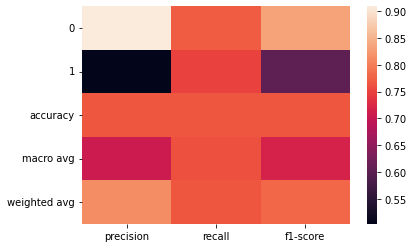

In [60]:
import seaborn as sns
sns.heatmap(pd.DataFrame(lgcl_report).iloc[:-1,:].T)

In [61]:
lgprob=lg.predict_proba(x_test)

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
lgsroc_auc_score=roc_auc_score(y_test,ypredict)

In [64]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,lgprob[:,1])

Text(0, 0.5, 'True positive rate')

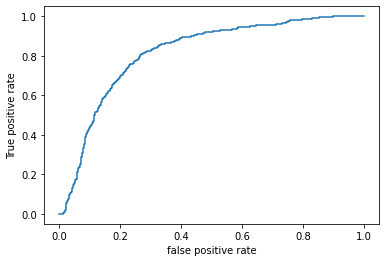

In [65]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="logisticregessioroccurve")
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score
lgcofusionmatrix=confusion_matrix(y_test,ypredict)
lgcofusionmatrix

array([[1766,  525],
       [ 177,  532]])

In [67]:
lgaccuracyscore=accuracy_score(y_test,ypredict)
lgaccuracyscore

0.766

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier()

In [70]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [71]:
rfy=rf.predict(x_test)

In [72]:
rfy

array([0, 0, 0, ..., 1, 0, 0])

In [73]:
rfcv=cross_val_score(rf,xtrain,ytrain,cv=5)

In [74]:
rfcv

array([0.97916667, 0.984375  , 0.98574561, 0.97971491, 0.98273026])

In [75]:
min(rfcv)

0.9791666666666666

In [76]:
max(rfcv)

0.9857456140350878

In [77]:
rfcv.mean()

0.9823464912280702

In [78]:
rfcl_report=classification_report(y_test,rfy,output_dict=True)

In [79]:
rfcl_report

{'0': {'precision': 0.9934612031386225,
  'recall': 0.9947621126145788,
  'f1-score': 0.9941112322791712,
  'support': 2291},
 '1': {'precision': 0.9830028328611898,
  'recall': 0.9788434414668548,
  'f1-score': 0.9809187279151943,
  'support': 709},
 'accuracy': 0.991,
 'macro avg': {'precision': 0.9882320179999062,
  'recall': 0.9868027770407168,
  'f1-score': 0.9875149800971827,
  'support': 3000},
 'weighted avg': {'precision': 0.9909895416297226,
  'recall': 0.991,
  'f1-score': 0.990993403747818,
  'support': 3000}}

<AxesSubplot:>

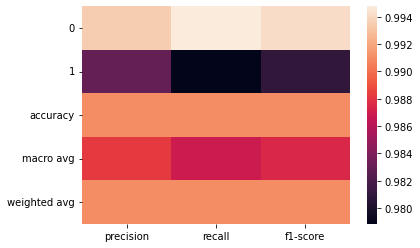

In [80]:
sns.heatmap(pd.DataFrame(rfcl_report).iloc[:-1,:].T)

In [81]:
rfrocaucscore=roc_auc_score(y_test,rfy)
rfrocaucscore

0.9868027770407167

Text(0, 0.5, 'true positive rate')

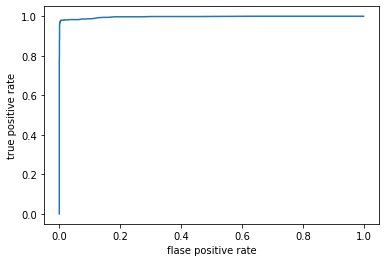

In [83]:
fpr,tpr,threshold=roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label="randomforestclassifierrocc_curve")
plt.xlabel("flase positive rate")
plt.ylabel("true positive rate")

In [84]:
rfconfusionmatrix=confusion_matrix(y_test,rfy)
rfconfusionmatrix


array([[2279,   12],
       [  15,  694]])

In [85]:
rfaccuracyscore=accuracy_score(y_test,rfy)
rfaccuracyscore

0.991

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gradientboostclassifier=GradientBoostingClassifier(learning_rate=0.1)

In [88]:
gradientboostclassifier.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [89]:
ypre=gradientboostclassifier.predict(x_test)

In [90]:
ypre

array([0, 0, 0, ..., 1, 0, 0])

In [91]:
gbcv=cross_val_score(gradientboostclassifier,xtrain,ytrain,cv=5)

In [92]:
gbcv

array([0.9566886 , 0.96162281, 0.96436404, 0.95942982, 0.96025219])

In [93]:
gbcv.mean()

0.9604714912280702

In [94]:
gdcl_report=classification_report(y_test,ypre,output_dict=True)

In [95]:
gdcl_report

{'0': {'precision': 0.9802023757149142,
  'recall': 0.9725010912265386,
  'f1-score': 0.9763365468886942,
  'support': 2291},
 '1': {'precision': 0.9133425034387895,
  'recall': 0.9365303244005642,
  'f1-score': 0.924791086350975,
  'support': 709},
 'accuracy': 0.964,
 'macro avg': {'precision': 0.9467724395768519,
  'recall': 0.9545157078135513,
  'f1-score': 0.9505638166198346,
  'support': 3000},
 'weighted avg': {'precision': 0.9644011592336567,
  'recall': 0.964,
  'f1-score': 0.9641546363816133,
  'support': 3000}}

<AxesSubplot:>

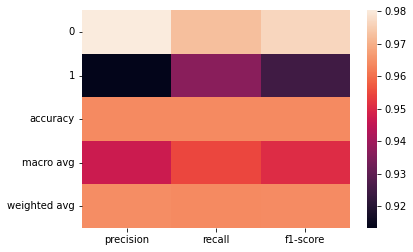

In [96]:
sns.heatmap(pd.DataFrame(gdcl_report).iloc[:-1,:].T)

In [97]:
gbrocaucscore=roc_auc_score(y_test,ypre)
gbrocaucscore

0.9545157078135513

In [150]:
gbconfusionmatrix=confusion_matrix(y_test,ypre)
gbconfusionmatrix

array([[2228,   63],
       [  45,  664]])

In [ ]:
gbroccurve=roc_curve(y_test,gradientboostclassifier.predict_proba(x_test)[:,1])

In [ ]:
fpr,tpr,thresholds=gbroccurve

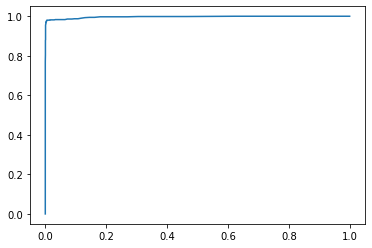

In [98]:
plt.plot(fpr,tpr,label="gradientboostingclassifierroc_curve")

In [129]:
rfpredprob=rf.predict_proba(x_test)

In [130]:
rfpredprob


array([[0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.98, 0.02]])

In [131]:
rfpredprobdf=pd.DataFrame(rfpredprob)

In [132]:
rfpredprobdf

,0,1
0,0.99,0.01
1,0.98,0.02
2,1.00,0.00
3,0.96,0.04
4,0.97,0.03
...,...,...
2995,0.00,1.00
2996,1.00,0.00
2997,0.00,1.00
2998,0.99,0.01


In [133]:
rfpredprobdf.columns=["negitive_class","positive_class"]

In [134]:
rfpredprobdf

,negitive_class,positive_class
0,0.99,0.01
1,0.98,0.02
2,1.00,0.00
3,0.96,0.04
4,0.97,0.03
...,...,...
2995,0.00,1.00
2996,1.00,0.00
2997,0.00,1.00
2998,0.99,0.01


In [143]:

    def fun(x):
        if x<0.2:
            return ("safezone")
        elif x > 0.2 and x< 0.6:
            return("Low risk zone")
        elif x > 0.6 and x<0.9:
            return("medium  risk zone")
        elif x >0.9:
            return("High risk zone")
    
    

In [144]:
rfpredprobdf["positive_class_zone"]=[fun(x)   for x in rfpredprobdf["positive_class"]]

In [145]:
rfpredprobdf

,negitive_class,positive_class,positive_class_zone
0,0.99,0.01,safezone
1,0.98,0.02,safezone
2,1.00,0.00,safezone
3,0.96,0.04,safezone
4,0.97,0.03,safezone
...,...,...,...
2995,0.00,1.00,High risk zone
2996,1.00,0.00,safezone
2997,0.00,1.00,High risk zone
2998,0.99,0.01,safezone
